# Pandas Cheat Sheet

## Creating DataFrames

In [19]:
import pandas as pd
df = pd.DataFrame(
    {"a":[4,5,6],
     "b":[7,8,9],
     "c":[10,11,12]},
    index=[1,2,3])
# Specifiy values for each column

In [20]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [21]:
df = pd.DataFrame(
    [[4,7,10],
     [5,8,11],
     [6,9,12]],
    index=[1,2,3],
    columns=['a',"b","c"])
# Specifiy values for each column

In [22]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [27]:
df=pd.DataFrame(
    {"a":[4,5,6],
     "b":[7,8,9],
     "c":[10,11,12]},
index = pd.MultiIndex.from_tuples(
        [("d",1),("d",2),("e",2)],names=["n","v"]))

In [28]:
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

## method chaining

most pandas methods return a dataframe so that another pandas method can be applied to the result. this improves readability of code

In [25]:
df = (pd.melt(df).rename(columns={"variable":"var","value":"val"}).query("val>=200"))

## reshaping data - change layout,sorting,reindexing,renaming

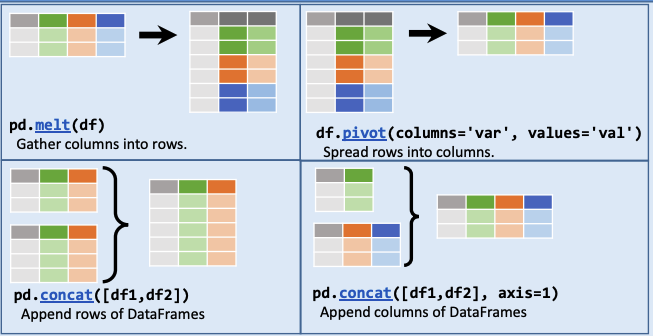

In [ ]:
pd.melt(df) #gather columns into rows

In [ ]:
df.pivot(columns="variable",values="value")#spread rows into columns

In [ ]:
pd.concat([df1,df2],axis=1)#按列合并2个dataframe
pd.concat([df1,df2])#按行合并2个dataframe

In [ ]:
df.sort_value("mpg") #order rows by values of a column(low to high)

In [ ]:
df.sort_value("mpg") #order rows by values of a column(high to low)

In [ ]:
df.rename(column ={"y":"year"}) #reanme the columns of a dataframe

In [ ]:
df.sort_index() #sort the index of a dataframe

In [ ]:
df.reset_index() #reste index of dataframe to row numbers, moving index to columns

In [ ]:
df.drop(columns=["Length","Height"]) #Drop columns from Dataframe

## Subset Observations -rows

In [ ]:
df[df.Length > 7] #Extract rows that meet logical criteria.

In [ ]:
df.drop_duplicates() #Remove duplicate rows (only considers columns).

In [ ]:
df.sample(frac=0.5) #Randomly select fraction of rows. 

In [ ]:
df.sample(n=10) #Randomly select n rows

In [ ]:
df.nlargest(n, "value") #select and order top n entries.

In [ ]:
df.nsmallest(n, 'value') #Select and order bottom n entries.

In [ ]:
df.head(n) #Select first n rows.

In [ ]:
df.tail(n) #Select last n rows

## Subset Varibales -columns

In [ ]:
df[["width","length","species"]] #Select multiple columns with specific names.

In [ ]:
df["width"] or df.width #Select single column with specific name

In [ ]:
df.filter(regex='regex') #Select columns whose name matches regular expression regex

## Using query

query() allows Boolean expressions for filtering
rows

In [ ]:
df.query('Length > 7')

In [ ]:
df.query('Length > 7 and Width < 8')

In [ ]:
df.query('Name.str.startswith("abc")',engine="python")

## Subsets - rows and columns

* Use df.loc[] and df.iloc[] to select only rows, only columns or both.
* Use df.at[] and df.iat[] to access a single value by row and column.
* First index selects rows, second index columns

In [ ]:
df.iloc[10:20] #Select rows 10-20

In [ ]:
df.iloc[:, [1, 2, 5]] # Select columns in positions 1, 2 and 5 (first column is 0)

In [ ]:
df.loc[:, 'x2':'x4'] # Select all columns between x2 and x4 (inclusive).

In [ ]:
df.loc[df["a"] > 10, ["a", "c"]] #Select rows meeting logical condition, and only the specific columns.

In [ ]:
df.iat[1, 2] # Access single value by index

In [ ]:
df.at[4, 'A'] #Access single value by label

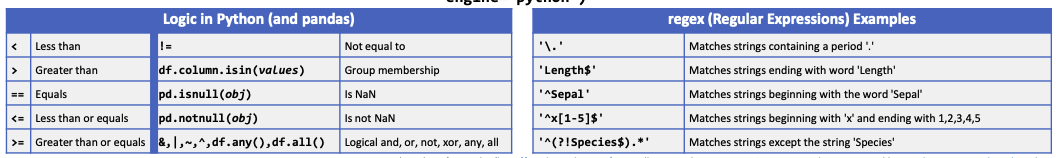

## Summarize Data

In [ ]:
df['w'].value_counts() #Count number of rows with each unique value of variable

In [ ]:
len(df) # of rows in DataFrame.

In [ ]:
df.shape #Tuple of of rows, of columns in DataFrame

In [ ]:
df['w'].nunique() # of distinct values in a column

In [ ]:
df.describe() #Basic descriptive and statistics for each column (or GroupBy).

pandas provides a large set of summary functions that operate on
different kinds of pandas objects (DataFrame columns, Series,
GroupBy, Expanding and Rolling (see below)) and produce single
values for each of the groups. When applied to a DataFrame, the
result is returned as a pandas Series for each column. Examples:

In [ ]:
sum() #Sum values of each object.

In [ ]:
min() #Minimum value in each object.

In [ ]:
count() #Count non-NA/null values of each object.

In [ ]:
median() #Median value of each object.

In [ ]:
quantile([0.25,0.75]) #Quantiles of each object.

In [ ]:
apply(function) #Apply function to each object.

In [ ]:
min() #Minimum value in each object.

In [ ]:
max() #Maximum value in each object.

In [ ]:
mean() #Mean value of each object.

In [ ]:
var() #Variance of each object.

In [ ]:
std() #Standard deviation of each object.

# Handling Missing Data

In [ ]:
df.dropna() #Drop rows with any column having NA/null data.

In [ ]:
df.fillna(value) #Replace all NA/null data with value.

## Make New Columns

In [ ]:
df.assign(Area=lambda df: df.Length*df.Height) #Compute and append one or more new columns.

In [ ]:
df['Volume'] = df.Length*df.Height*df.Depth #Add single column

In [ ]:
pd.qcut(df.col, n, labels=False) #Bin column into n buckets.

pandas provides a large set of vector functions that operate on all
columns of a DataFrame or a single selected column (a pandas
Series). These functions produce vectors of values for each of the
columns, or a single Series for the individual Series. Examples:

In [ ]:
max(axis=1) #Element-wise max.

In [ ]:
min(axis=1) #Element-wise min.

In [ ]:
clip(lower=-10,upper=10) #Trim values at input thresholds

In [ ]:
abs() #Absolute value.

# Group Data

In [ ]:
df.groupby(by="col") #Return a GroupBy object, grouped by values in column named "col".

In [ ]:
df.groupby(level="ind") #Return a GroupBy object, grouped by values in index level named "ind".

All of the summary functions listed above can be applied to a group. Additional GroupBy functions:

In [ ]:
size() #Size of each group.

In [ ]:
agg(function) #Aggregate group using function

The examples below can also be applied to groups. In this case, the
function is applied on a per-group basis, and the returned vectors
are of the length of the original DataFrame.

In [ ]:
shift(1) #Copy with values shifted by 1.

In [ ]:
shift(-1) #Copy with values lagged by 1

In [ ]:
rank(method='dense') #Ranks with no gaps.

In [ ]:
cumsum() #Cumulative sum.

In [ ]:
rank(method='min') #Ranks. Ties get min rank.

In [ ]:
cummax() #Cumulative max

In [ ]:
rank(pct=True) #Ranks rescaled to interval [0, 1].

In [ ]:
cummin() #Cumulative min.

In [ ]:
rank(method='first') #Ranks. Ties go to first value.

In [ ]:
cumprod() #Cumulative product

## Combine data sets

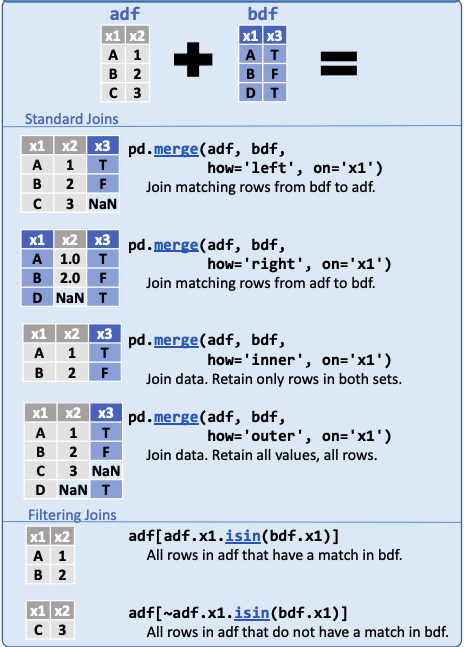

In [ ]:
pd.merge(adf,bdf,how ="left",on= "x1") #Join matching rows from bdf to adf.

In [ ]:
pd.merge(adf,bdf,how ="right",on= "x1") #Join matching rows from adf to bdf.

In [ ]:
pd.merge(adf,bdf,how ="inner",on= "x1") #Join data. Retain only rows in both sets.

In [ ]:
pd.merge(adf,bdf,how ="outer",on= "x1") #Join data. Retain all values, all rows.

In [ ]:
adf[adf.x1.isin(bdf.x1)] #All rows in adf that have a match in bdf.

In [ ]:
adf[~adf.x1.isin(bdf.x1)] #All rows in adf that do not have a match in bdf.

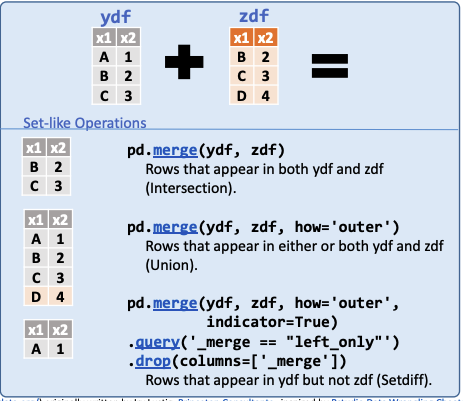

In [ ]:
pd.merge(ydf,zdf)#Rows that appear in both ydf and zdf(Intersection).

In [ ]:
pd.merge(ydf,zdf,how="outer")#Rows that appear in either or both ydf and zdf(Union).

In [ ]:
pd.merge(ydf,zdf,how="outer",indicator=True).query('_merge == "left_only"').drop(columns=['_merge']))#Rows that appear in ydf but not zdf (Setdiff).

# plotting 

In [ ]:
df.plot.hist() #Histogram for each column

In [ ]:
df.plot.scatter(x='w',y='h')#Scatter chart using pairs of points